---------- Punto 1 ----------
(4391, 5)
           yy      mm           dd         data
count  4391.0  4391.0  4391.000000  3144.000000
mean   2021.0     1.0    15.943065     6.701559
std       0.0     0.0     8.893572     2.184213
min    2021.0     1.0     1.000000     1.900000
25%    2021.0     1.0     8.000000     5.000000
50%    2021.0     1.0    16.000000     6.400000
75%    2021.0     1.0    24.000000     8.300000
max    2021.0     1.0    31.000000    14.400000
---------- Punto 2.1 ----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4391 entries, 0 to 4390
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   yy      4391 non-null   int64  
 1   mm      4391 non-null   int64  
 2   dd      4391 non-null   int64  
 3   time    4391 non-null   object 
 4   data    3144 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 171.6+ KB
None
---------- Punto 2.2 ----------
Mediana de los datos: 6.4
Moda

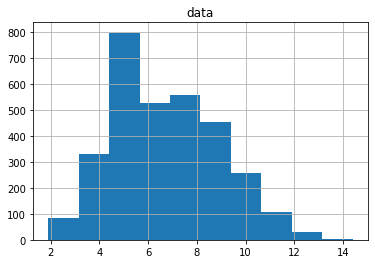

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Funciones auxiliares
def leer_datos() -> pd.DataFrame:
    return pd.read_csv("data_to_analyze_tp1_2021.txt")


def transformar_datetime(df: pd.DataFrame) -> pd.DataFrame:
    # devuelde un data frame con la columna datetime y data
    df[["hour", "minute"]] = df.time.str.split(":", expand=True)

    df["datetime"] = pd.to_datetime(
        dict(
            year=df.yy,
            month=df.mm,
            day=df.dd,
            hour=df.hour,
            minute=df.minute,
        )
    )
    df = df.drop(["yy", "mm", "dd", "time", "hour", "minute"], axis=1)
    return df


df = leer_datos()
# Punto 1
print("---------- Punto 1 ----------")
print(df.shape)
print(df.describe())

# Punto 2
print("---------- Punto 2.1 ----------")
print(df.info())

print("---------- Punto 2.2 ----------")
print("Mediana de los datos: {}".format(df.data.median()))
print("Moda de los datos: {}".format(df.data.mode()))
print("Desviación estandar de los datos: {}".format(df.data.std()))

print("---------- Punto 3 ----------")
# transformo dataframe para generar una columna datetime
df = transformar_datetime(df)


# para ve la resolución de los datos, calculo 
# la diferencia de las fechas y las promedio

resolucion = df.diff()['datetime'].mean()
print("Promedio:", resolucion)
print("Observando el promedio tengo que resolución de los datos es cada 10 minutos")



# Punto 5
# calculo la diferencia en valor abs de los minutos de cada registro

dist_min = df["datetime"].dt.minute.diff().abs()

tot = 0
for i in dist_min:
    if i>10 and i!=50:
        tot += i/10

print("Cantidad de registros que faltan con respecto a la resolucion: ", tot)


print("---------- Punto 7 ----------")
df.hist("data")

print("---------- Punto 8 ----------")
# plt.plot(df.datetime, df.data)


# Punto 1
En código

# Punto 2
En código

# Punto 3
* Los datos poseen una resolución de 10 minutos.
* En teoría por cada hora se reciben 6 registros nuevos, por lo que en un día se tendrían 144 (6 * 24) datos.
* Existen períodos donde los datos no llegan cada 10 minutos.

# Punto 4
Para comparar los datos con otros datos con menor resolucion podemos:
1. Inferir los datos faltantes en el set de datos con menor resolución y tratar de aumentar su resolución
2. Disminuir la resolución de los datos con mayor resolución.
* Considero que es mas apropiado la segunda opción ya que evita el posible error que podría implicar una inferencia de los datos faltantes

# Punto 5
* Cantidad total de filas: 4391
* Cantidad total de registros: 3144
* Registros nulos: 1247

* Registros faltantes según la resolución: 24
* Registros faltantes en total: 1271

### Los datos faltantes representan el 28,95% de los datos totales

* Para completar los registros faltantes utilizaría el valor promedio

# Punto 6
En código

# Punto 7
De la gráfica se observa que los datos siguen una distribución normal

# Punto 8
Se observa que los datos siguen aproximadamente una tendencia senoidal

# Punto 9
En código

# Punto 10
Utilizaría el segmento con menos datos faltantes y mejor resolución. Ya que sería el más apegado la "realidad".